In this tutorial, we will train a very simple autoencodeer.
We discretize a function in `N_points` and give it as input to the autoencoder. 
We want the output to be the function itself.
However, since there is a very small layer in the middle of the autoencoder (_bottleneck_), the task is not trivial. 
In other words, the central layer will contain a compressed representation of the function.
In particular, we choose a set of random gaussians with different mean $\mu$ and standard deviation $\sigma$ as functions. 

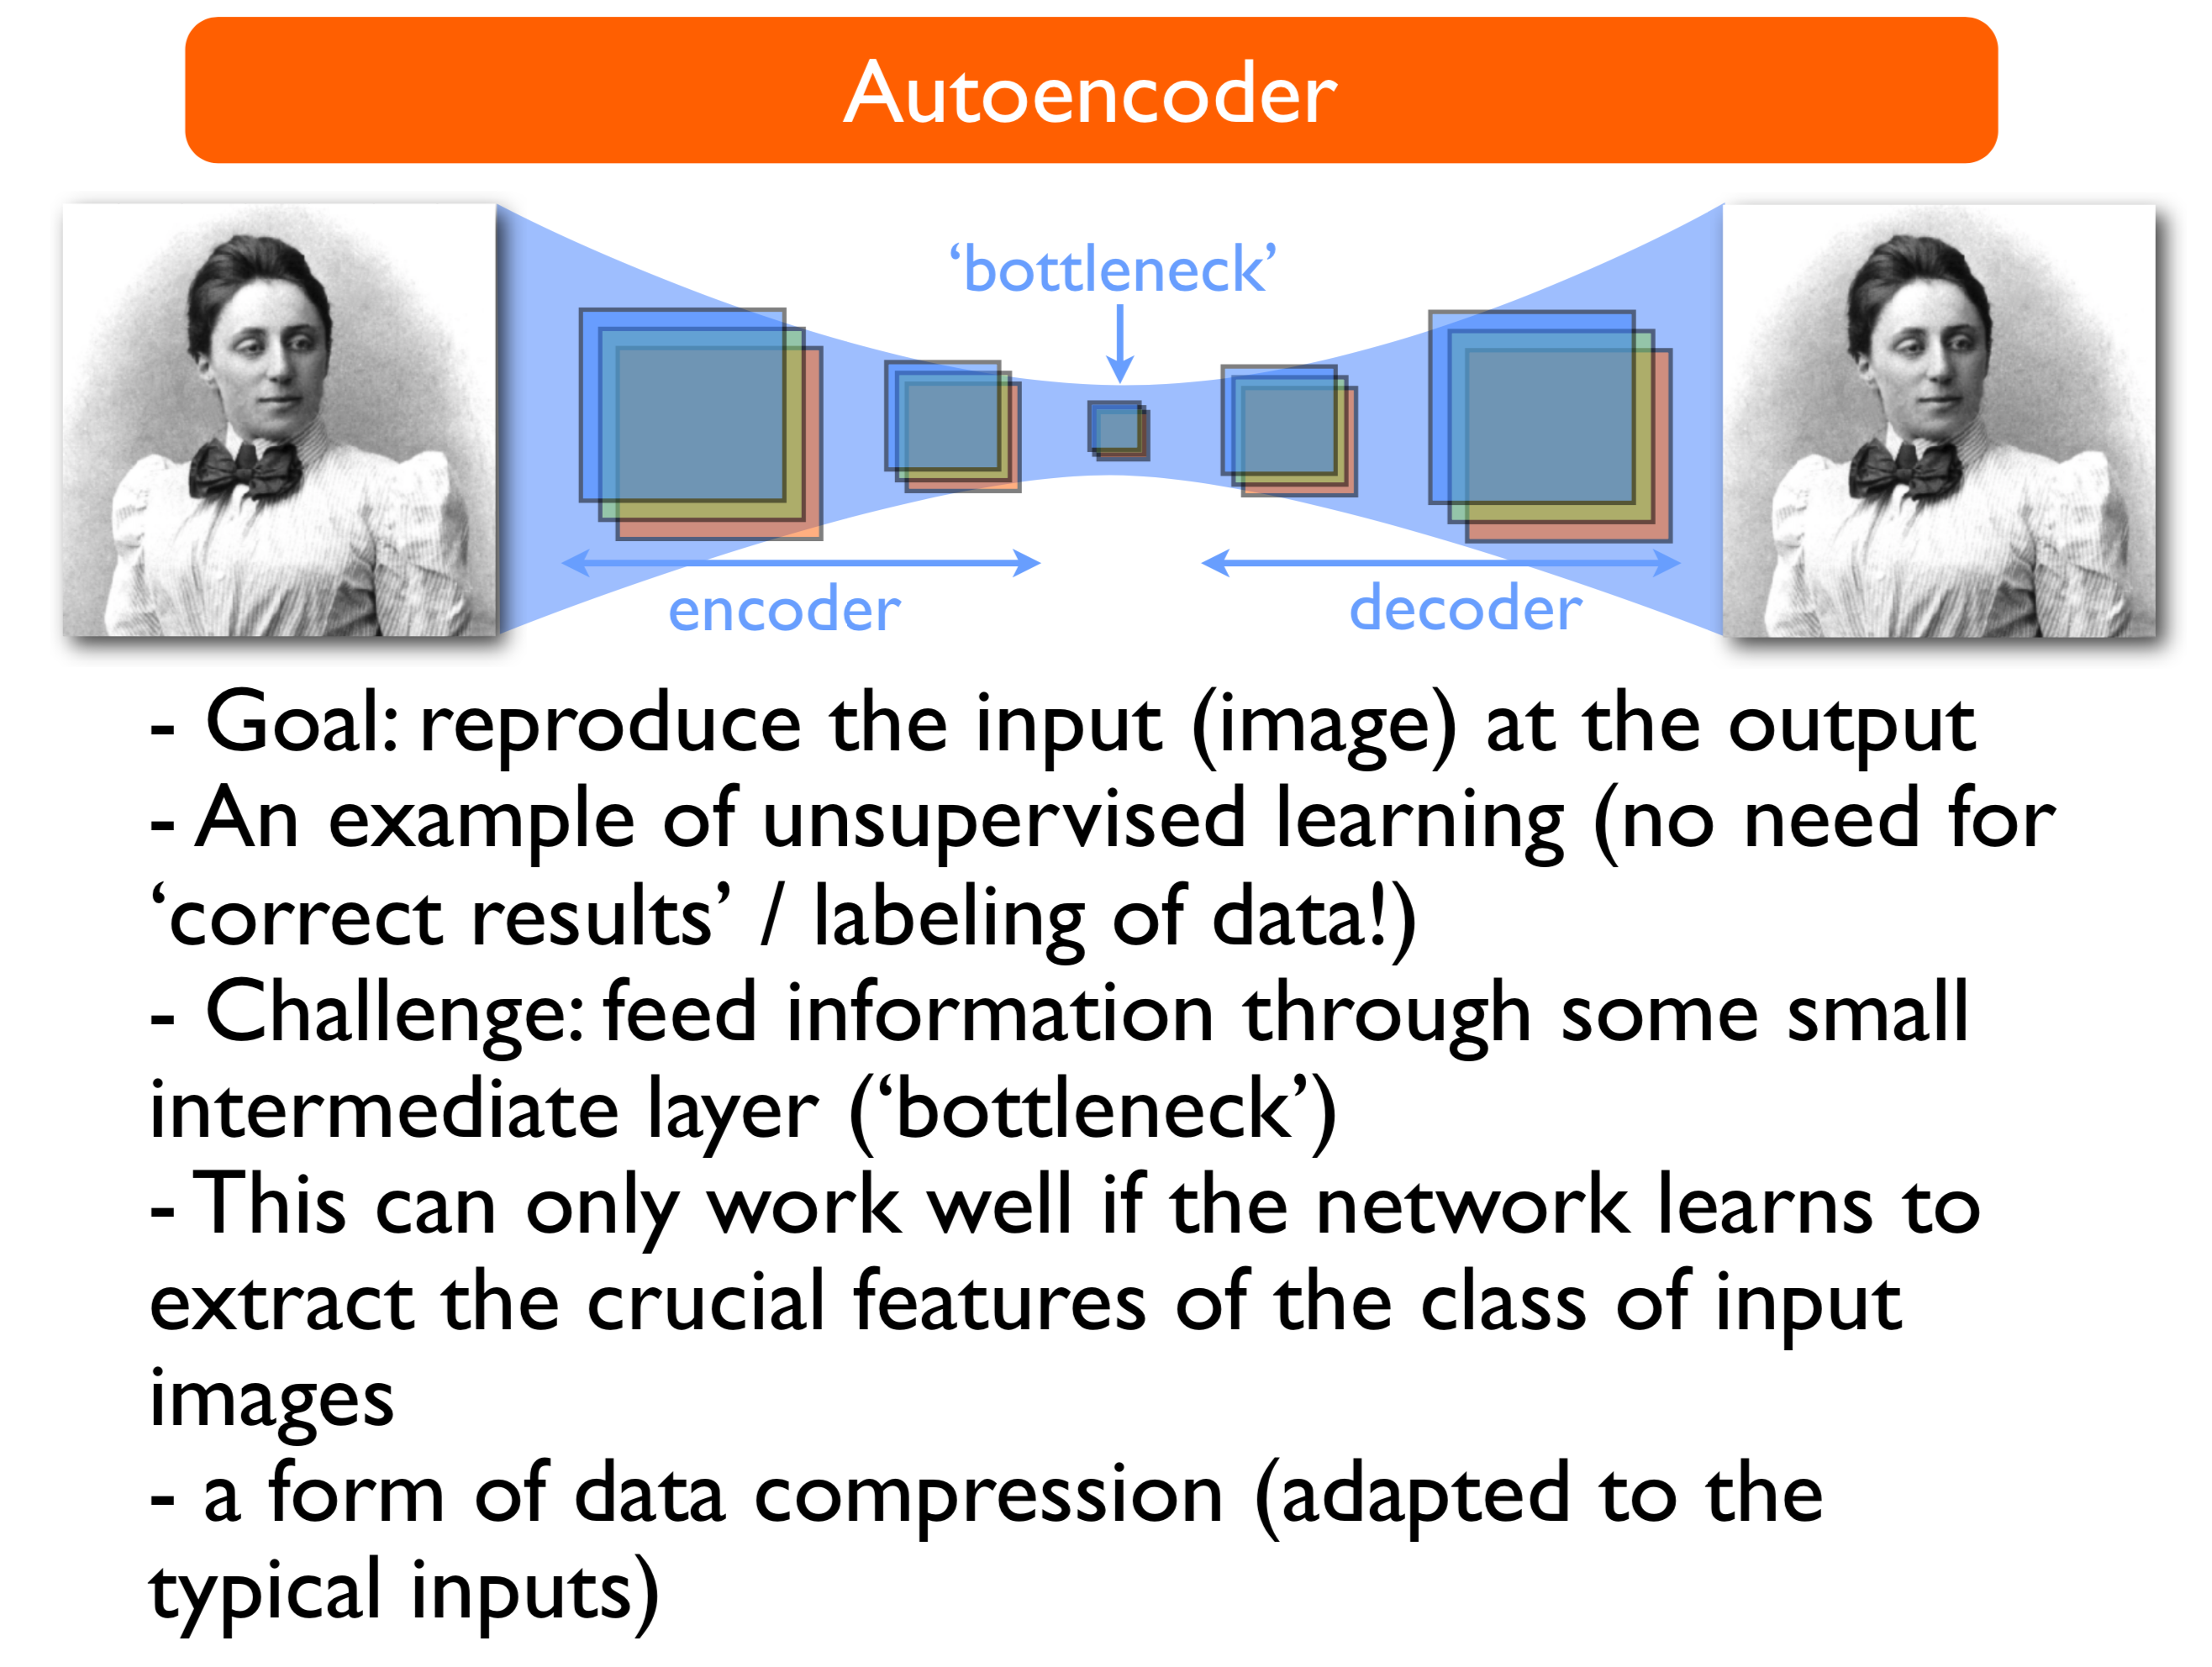

# Import libraries

In [1]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt

c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

---

# Create samples batches

Write a function that generates `N_batch` functions, each one discretized in `N_points` between `xmin` and `xmax`.
Extract a different $\mu$ and $\sigma$ for each gaussian.

In [2]:
xmin = -10.
xmax = 10.

sigma_min = 1
sigma_max = 5

mu_min = -2
mu_max = 2

N_points = 100
N_batch=1000

In [3]:
def get_batch(N_batch):
    mu = np.random.uniform(mu_min, mu_max, [N_batch,1])
    sigma = np.random.uniform(sigma_min, sigma_max, [N_batch,1])
    
    x = np.linspace(xmin,xmax,N_points)
    
    return 1/np.sqrt(2*np.pi* sigma**2)*np.exp(-0.5*((x-mu)/sigma)**2)

## Check the generated functions: 
create a plot that shows a few random generated gaussians.

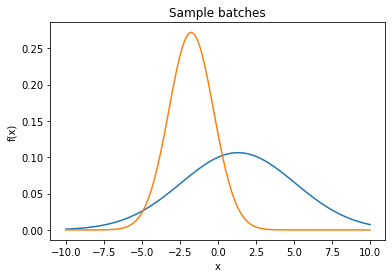

In [4]:
x = np.linspace(xmin,xmax,N_points)
y1 = get_batch(N_batch)[0,:]
y2 = get_batch(N_batch)[1,:]
plt.figure()
plt.title("Sample batches")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

---

# Create the neural network

Define a fully connected neural network in Keras with the following structure

`input` $> 90 > 50 > 2 >50 >90> $ `output`

The layer with $2$ neurons is the bottleneck!

Compile the network with the approriate loss function and with a convenient optimizer.

In [5]:
def create_net():
    net = K.Sequential()
    
    net.add( K.layers.Dense(90, input_shape=(100,)))
    net.add( K.layers.Dense(50))
    net.add( K.layers.Dense(2, name="bottleneck"))
    net.add( K.layers.Dense(50))
    net.add( K.layers.Dense(90))
    net.add( K.layers.Dense(100))
    
    net.compile(loss="mean_squared_error", optimizer="adam")
    
    net.summary()
    
    encoder_net = K.Model(inputs=net.input, outputs=net.get_layer("bottleneck").output)
    return net, encoder_net

In [6]:
net, encoder_net = create_net()
costs = []

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                9090      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4550      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 102       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_3 (Dense)              (None, 90)                4590      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               9100      
Tota

In [7]:
encoder_net.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 90)                9090      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4550      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 102       
Total params: 13,742
Trainable params: 13,742
Non-trainable params: 0
_________________________________________________________________


---

# Train the neural network

Train the neural network for a reasonable number of epochs. 
Save the value of the cost function at each step in order to plot it after the training.

In [8]:
N_epochs = 1000

for i in range(N_epochs):
    train_in = get_batch(N_batch)
    costs.append(net.train_on_batch(train_in,train_in))
    print("Epoch: %d" % i)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100

Epoch: 762
Epoch: 763
Epoch: 764
Epoch: 765
Epoch: 766
Epoch: 767
Epoch: 768
Epoch: 769
Epoch: 770
Epoch: 771
Epoch: 772
Epoch: 773
Epoch: 774
Epoch: 775
Epoch: 776
Epoch: 777
Epoch: 778
Epoch: 779
Epoch: 780
Epoch: 781
Epoch: 782
Epoch: 783
Epoch: 784
Epoch: 785
Epoch: 786
Epoch: 787
Epoch: 788
Epoch: 789
Epoch: 790
Epoch: 791
Epoch: 792
Epoch: 793
Epoch: 794
Epoch: 795
Epoch: 796
Epoch: 797
Epoch: 798
Epoch: 799
Epoch: 800
Epoch: 801
Epoch: 802
Epoch: 803
Epoch: 804
Epoch: 805
Epoch: 806
Epoch: 807
Epoch: 808
Epoch: 809
Epoch: 810
Epoch: 811
Epoch: 812
Epoch: 813
Epoch: 814
Epoch: 815
Epoch: 816
Epoch: 817
Epoch: 818
Epoch: 819
Epoch: 820
Epoch: 821
Epoch: 822
Epoch: 823
Epoch: 824
Epoch: 825
Epoch: 826
Epoch: 827
Epoch: 828
Epoch: 829
Epoch: 830
Epoch: 831
Epoch: 832
Epoch: 833
Epoch: 834
Epoch: 835
Epoch: 836
Epoch: 837
Epoch: 838
Epoch: 839
Epoch: 840
Epoch: 841
Epoch: 842
Epoch: 843
Epoch: 844
Epoch: 845
Epoch: 846
Epoch: 847
Epoch: 848
Epoch: 849
Epoch: 850
Epoch: 851
Epoch: 852

Plot the cost function

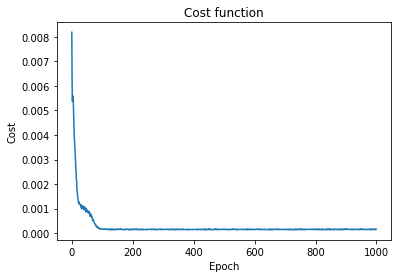

In [9]:
plt.figure()
plt.title("Cost function")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(costs)
plt.show()

Check the results on some random samples

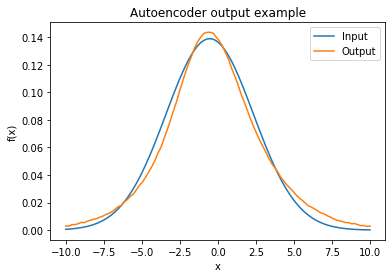

In [10]:
x = np.linspace(xmin,xmax,N_points)

input_sample = get_batch(1)
output_sample = net.predict(input_sample)

x = np.linspace(xmin,xmax,N_points)
plt.figure()
plt.title("Autoencoder output example")
plt.plot(x,input_sample.flatten(),label="Input")
plt.plot(x,output_sample.flatten(),label="Output")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

---

# Analyze the network

Inspect the bottleneck to understand eventual correlation with the mu and sigma of the gaussian.

Go back to the `create_net()` function and create a submodel which returns the first part of the network.
You can use the function `K.Model` and identify the desired output layer with `net.get_layer()`.
Please name the bottleneck layer with the argument `name=` in order to be able to access to it again.

`encoder_net = K.Model(inputs=net.input, outputs=net.get_layer("bottleneck").output)`

`net_out` will be the output of the encoder part of the autoencoder (`encoder_net`).
In order to create a bidimensional color plot of the plane $\sigma - \mu$, we want it to have a dimension:
`N_points x N_points x 2`.

In [11]:
mu = np.linspace(mu_min,mu_max,N_points)
sigma = np.linspace(sigma_min, sigma_max, N_points)

mu_grid, sigma_grid = np.meshgrid(mu, sigma)
mu_mesh = mu_grid.reshape([-1,1])
sigma_mesh = sigma_grid.reshape([-1,1])

x = np.linspace(xmin,xmax,N_points).reshape([1,-1])
    
x_in = 1/np.sqrt(2*np.pi* sigma_mesh**2)*np.exp(-0.5*((x-mu_mesh)/sigma_mesh)**2)

net_out = encoder_net.predict_on_batch(x_in).reshape([N_points,N_points,2])

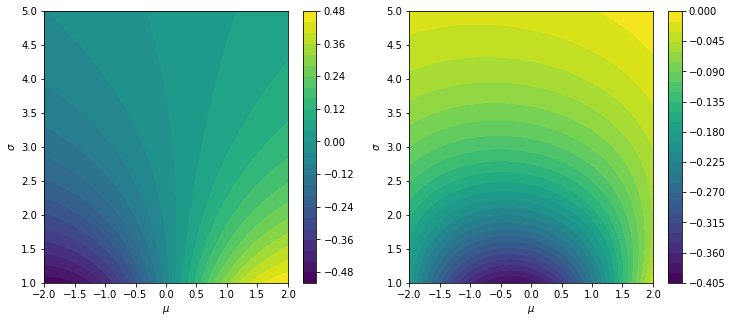

In [12]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.contourf(mu_grid, sigma_grid, net_out[:,:,0],30)
plt.colorbar()
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")

plt.subplot(1,2,2)
plt.contourf(mu_grid, sigma_grid, net_out[:,:,1],30)
plt.colorbar()
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")
plt.show()

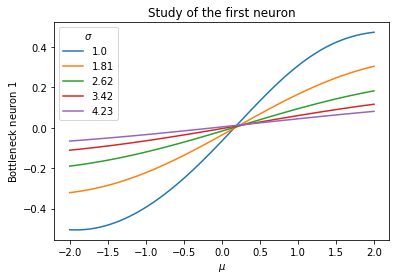

In [13]:
plt.figure()
plt.title("Study of the first neuron")
plt.xlabel(r"$\mu$")
plt.ylabel(r"Bottleneck neuron $1$")
for i in range(0,100,20):
    plt.plot(mu, net_out[i,:,0], label=np.round(sigma[i],2))
    
    
plt.legend(title=r"$\sigma$")
plt.show()

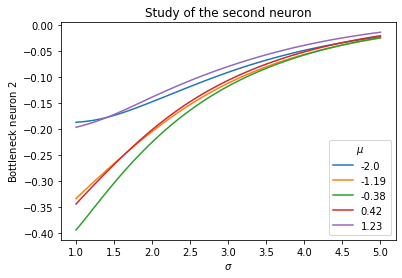

In [14]:
plt.figure()
plt.title("Study of the second neuron")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"Bottleneck neuron $2$")
for i in range(0,100,20):
    plt.plot(sigma, net_out[:,i,1], label=np.round(mu[i],2))
    
    
plt.legend(title=r"$\mu$")
plt.show()

---

# (*BONUS*) Add noise to the samples

Create a function that adds some noise to a given set of functions (the input y will have shape `N_batch x N_points`).
For example, you could add some random zero-mean gaussian noise to each point of the samples.
Please do not allow negative values for the function.

Try to train again the neural network with noisy samples as inputs and with noiseless functions as training labels. 

In [15]:
def add_noise(y):
    shp = np.shape(y)
    delta = np.random.normal(0,0.01, [shp[0],shp[1]])
    return np.maximum(y+delta,0)

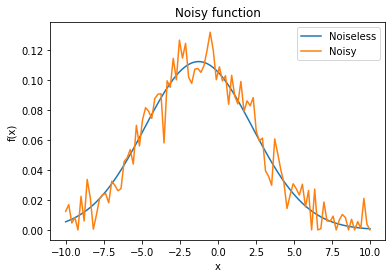

In [16]:
x = np.linspace(xmin,xmax,N_points)
test_in = get_batch(1)
test_noisy = add_noise(test_in)

plt.figure()
plt.title("Noisy function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, test_in[0,:],label="Noiseless")
plt.plot(x, test_noisy[0,:],label="Noisy")
plt.legend()
plt.show()

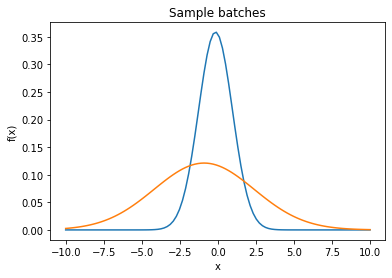

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                4550      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_8 (Dense)              (None, 90)                4590      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               9100      
Total params: 27,582
Trainable params: 27,582
Non-trainable params: 0
__________________________________________________

Epoch: 571
Epoch: 572
Epoch: 573
Epoch: 574
Epoch: 575
Epoch: 576
Epoch: 577
Epoch: 578
Epoch: 579
Epoch: 580
Epoch: 581
Epoch: 582
Epoch: 583
Epoch: 584
Epoch: 585
Epoch: 586
Epoch: 587
Epoch: 588
Epoch: 589
Epoch: 590
Epoch: 591
Epoch: 592
Epoch: 593
Epoch: 594
Epoch: 595
Epoch: 596
Epoch: 597
Epoch: 598
Epoch: 599
Epoch: 600
Epoch: 601
Epoch: 602
Epoch: 603
Epoch: 604
Epoch: 605
Epoch: 606
Epoch: 607
Epoch: 608
Epoch: 609
Epoch: 610
Epoch: 611
Epoch: 612
Epoch: 613
Epoch: 614
Epoch: 615
Epoch: 616
Epoch: 617
Epoch: 618
Epoch: 619
Epoch: 620
Epoch: 621
Epoch: 622
Epoch: 623
Epoch: 624
Epoch: 625
Epoch: 626
Epoch: 627
Epoch: 628
Epoch: 629
Epoch: 630
Epoch: 631
Epoch: 632
Epoch: 633
Epoch: 634
Epoch: 635
Epoch: 636
Epoch: 637
Epoch: 638
Epoch: 639
Epoch: 640
Epoch: 641
Epoch: 642
Epoch: 643
Epoch: 644
Epoch: 645
Epoch: 646
Epoch: 647
Epoch: 648
Epoch: 649
Epoch: 650
Epoch: 651
Epoch: 652
Epoch: 653
Epoch: 654
Epoch: 655
Epoch: 656
Epoch: 657
Epoch: 658
Epoch: 659
Epoch: 660
Epoch: 661

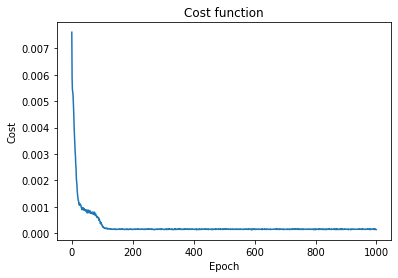

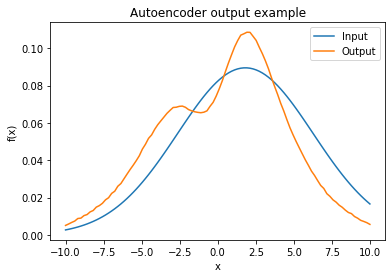

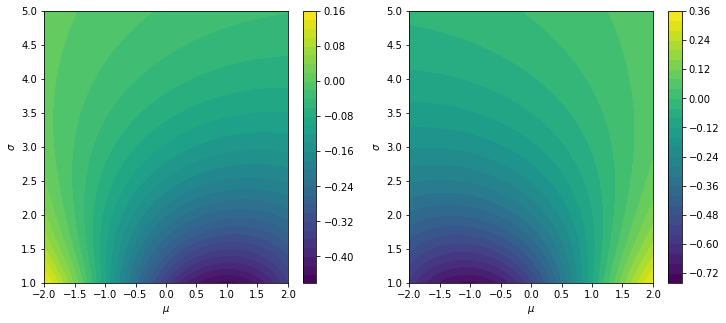

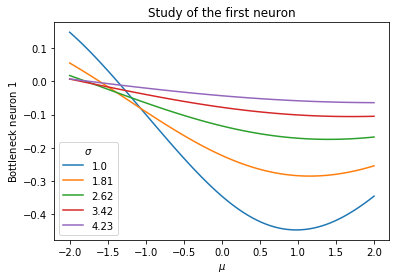

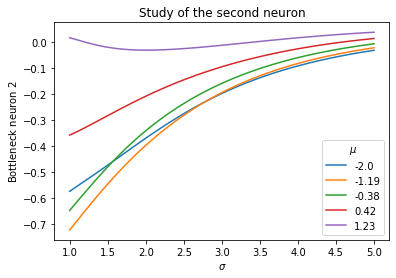

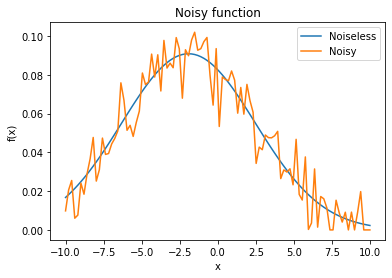

In [17]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt

xmin = -10.
xmax = 10.

sigma_min = 1
sigma_max = 5

mu_min = -2
mu_max = 2

N_points = 100
N_batch=1000

def get_batch(N_batch):
    mu = np.random.uniform(mu_min, mu_max, [N_batch,1])
    sigma = np.random.uniform(sigma_min, sigma_max, [N_batch,1])
    
    x = np.linspace(xmin,xmax,N_points)
    
    return 1/np.sqrt(2*np.pi* sigma**2)*np.exp(-0.5*((x-mu)/sigma)**2)

x = np.linspace(xmin,xmax,N_points)
y1 = get_batch(N_batch)[0,:]
y2 = get_batch(N_batch)[1,:]
plt.figure()
plt.title("Sample batches")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

def create_net():
    net = K.Sequential()
    
    net.add( K.layers.Dense(90, input_shape=(100,)))
    net.add( K.layers.Dense(50))
    net.add( K.layers.Dense(2, name="bottleneck"))
    net.add( K.layers.Dense(50))
    net.add( K.layers.Dense(90))
    net.add( K.layers.Dense(100))
    
    net.compile(loss="mean_squared_error", optimizer="adam")
    
    net.summary()
    
    encoder_net = K.Model(inputs=net.input, outputs=net.get_layer("bottleneck").output)
    return net, encoder_net

net, encoder_net = create_net()
costs = []

encoder_net.summary()

N_epochs = 1000

for i in range(N_epochs):
    train_in = get_batch(N_batch)
    costs.append(net.train_on_batch(train_in,train_in))
    print("Epoch: %d" % i)

plt.figure()
plt.title("Cost function")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(costs)
plt.show()

x = np.linspace(xmin,xmax,N_points)

input_sample = get_batch(1)
output_sample = net.predict(input_sample)

x = np.linspace(xmin,xmax,N_points)
plt.figure()
plt.title("Autoencoder output example")
plt.plot(x,input_sample.flatten(),label="Input")
plt.plot(x,output_sample.flatten(),label="Output")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

mu = np.linspace(mu_min,mu_max,N_points)
sigma = np.linspace(sigma_min, sigma_max, N_points)

mu_grid, sigma_grid = np.meshgrid(mu, sigma)
mu_mesh = mu_grid.reshape([-1,1])
sigma_mesh = sigma_grid.reshape([-1,1])

x = np.linspace(xmin,xmax,N_points).reshape([1,-1])
    
x_in = 1/np.sqrt(2*np.pi* sigma_mesh**2)*np.exp(-0.5*((x-mu_mesh)/sigma_mesh)**2)

net_out = encoder_net.predict_on_batch(x_in).reshape([N_points,N_points,2])

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.contourf(mu_grid, sigma_grid, net_out[:,:,0],30)
plt.colorbar()
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")

plt.subplot(1,2,2)
plt.contourf(mu_grid, sigma_grid, net_out[:,:,1],30)
plt.colorbar()
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")
plt.show()

plt.figure()
plt.title("Study of the first neuron")
plt.xlabel(r"$\mu$")
plt.ylabel(r"Bottleneck neuron $1$")
for i in range(0,100,20):
    plt.plot(mu, net_out[i,:,0], label=np.round(sigma[i],2))
    
    
plt.legend(title=r"$\sigma$")
plt.show()

plt.figure()
plt.title("Study of the second neuron")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"Bottleneck neuron $2$")
for i in range(0,100,20):
    plt.plot(sigma, net_out[:,i,1], label=np.round(mu[i],2))
    
    
plt.legend(title=r"$\mu$")
plt.show()

def add_noise(y):
    shp = np.shape(y)
    delta = np.random.normal(0,0.01, [shp[0],shp[1]])
    return np.maximum(y+delta,0)

x = np.linspace(xmin,xmax,N_points)
test_in = get_batch(1)
test_noisy = add_noise(test_in)

plt.figure()
plt.title("Noisy function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, test_in[0,:],label="Noiseless")
plt.plot(x, test_noisy[0,:],label="Noisy")
plt.legend()
plt.show()